**Assignment 4: Principal Component Analysis**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*

*Student: Hailey Robertson*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Assignments
```

4. Move the 04_assignment_pca.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Assignments
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Assignments/04_assignment_pca.ipynb
```

In this assignment, we will use principal component analysis (PCA) to compress data. We will first train PCA to find the linear transformation that will preserve variance within a dataset. We will measure loss by reconstruction. We will also use PCA to synthesize new examples.

We will work with two datasets: the handwritten digits dataset and the Olivetti faces dataset, to explore how PCA performs on different types of image data.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. List any collaborators.

```
Collaborators: None.
```

Import packages

In [1]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings(action='ignore')
np.random.seed(42)  # Set a fixed seed for reproducibility

Plotting functions

In [2]:
def plot(x, y, title, xlabel, ylabel):
    '''
    Plots x against y with plot title

    Arg(s):
        x : numpy[float32]
            array of values
        y : numpy[float32]
            array of values
        title : str
            (super)title of plot
        xlabel : str
            label of x axis
        ylabel : str
            label of y axis
    '''

    # Create a 1 x 1 figure
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # DONE: Plot y against x, set marker to 'o', color to 'b'
    ax.plot(x, y, marker='o', color='b')

    # DONE: Create super title for figure
    fig.suptitle(title)

    # DONE: Set x and y axis with labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


def plot_images(X, n_row, n_col, title, cmap='gray'):
    '''
    Creates n_row by n_col panel of images

    Args:
        X : numpy[float32]
            N x h x w numpy array
        n_row : int
            number of rows in figure
        n_col : list[str]
            number of columns in figure
        title : str
            title of plot
        cmap : str
            colormap to use for visualizing images
    '''

    fig = plt.figure(figsize=(10, 10))

    # DONE: Set title as figure super title
    fig.suptitle(title)


    # DONE?: Iterate through X and plot the first n_row x n_col elements as figures
    # visualize using the specified 'gray' colormap
    # use plt.box(False) and plt.axis('off') to turn off borders and axis
    for i in range(0, n_row * n_col):
        ax = fig.add_subplot(n_row, n_col, i + 1)
        ax.imshow(X[i], cmap='gray')
        plt.box(False)
        plt.axis('off')



Implementation of Principal Component Analysis (PCA) for dimensionality reduction

In [3]:
class PrincipalComponentAnalysis(object):

    def __init__(self, d):
        # Number of eigenvectors to keep
        self.__d = d

        # Mean of the dataset
        self.__mean = None

        # Linear weights or transformation to project to lower subspace
        self.__weights = None

        # Eigenvalues of the dataset
        self.__eigenvalues = None

    def __center(self, X):
        '''
        Centers the data to zero-mean

        Args:
            X : numpy[float32]
                N x D feature vectors
        Returns:
            numpy[float32] : N x D centered feature vectors
        '''

        # DONE: Center the data

        return X - self.__mean

    def __covariance_matrix(self, X):
        '''
        Computes the covariance matrix of feature vectors

        Args:
            X : numpy[float32]
                N x D feature vectors
        Returns:
            numpy[float32] : D x D covariance matrix
        '''

        # DONE?: Compute the covariance matrix
        N = X.shape[0]
        return (1 / (N-1)) * np.dot(X.T, X)

    def fit(self, X):
        '''
        Obtains the top d eigenvectors (weights) from the input feature vectors

        Arg(s):
            X : numpy[float32]
                N x D feature vector
        '''

        # DONE?: Implement the fit function

        # Make sure that d is less or equal D
        assert self.__d <= X.shape[1]

        # DONE: Compute mean
        self.__mean = np.mean(X, axis=0)

        # DONE: Compute the covariance matrix
        X = self.__center(X)
        cov = self.__covariance_matrix(X)


        # DONE: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # DONE?: Store the top d eigenvalues
        self.__eigenvalues = eigenvalues[:self.__d]

        # DONE?: Select the top d eigenvectors
        self.__weights = eigenvectors[:, :self.__d]

    def project_to_subspace(self, X):
        '''
        Project data X to lower dimension subspace using the top d eigenvectors

        Arg(s):
            X : numpy[float32]
                N x D feature vectors
        Returns:
            numpy[float32] : N x d feature vectors
        '''

        # DONE: Computes transformation to lower dimension and project to subspace

        return np.dot(X - self.__mean, self.__weights)

    def get_eigenvalues(self):
        '''
        Returns eigenvalues

        Returns:
            numpy[float32] : eigenvalues
        '''

        return self.__eigenvalues

    def get_weights(self):
        '''
        Returns weights (eigenvectors)

        Returns:
            numpy[float32] : weights
        '''

        return self.__weights

    def get_mean(self):
        '''
        Returns mean

        Returns:
            numpy[float32] : mean
        '''

        return self.__mean

    def reconstruct_from_subspace(self, Z):
        '''
        Reconstruct the original feature vectors from the latent vectors

        Arg(s):
            Z : numpy[float32]
                N x d latent vectors
        Returns:
            numpy[float32] : N x D feature vectors
        '''

        # DONE: Reconstruct the original feature vector

        return np.dot(Z, self.__weights.T) + self.__mean

    def generate_new_samples(self, m):
        '''
        Generates new data points by sampling from a normal distribution

        Arg(s):
            m : int
                number of samples to generate
        Returns:
            numpy[float32] : m x D samples
        '''

        # DONE: Generate new samples

        return np.dot(np.random.randn(m, self.__d), self.__weights.T) + self.__mean

## Part 1: Handwritten Digits Dataset

Load digits dataset

In [4]:
# Load digits dataset
dataset = skdata.load_digits()

# Dataset of image, currently vectorized as (N, 64) shape
X = dataset.data
y = dataset.target

Visualize digits dataset as images

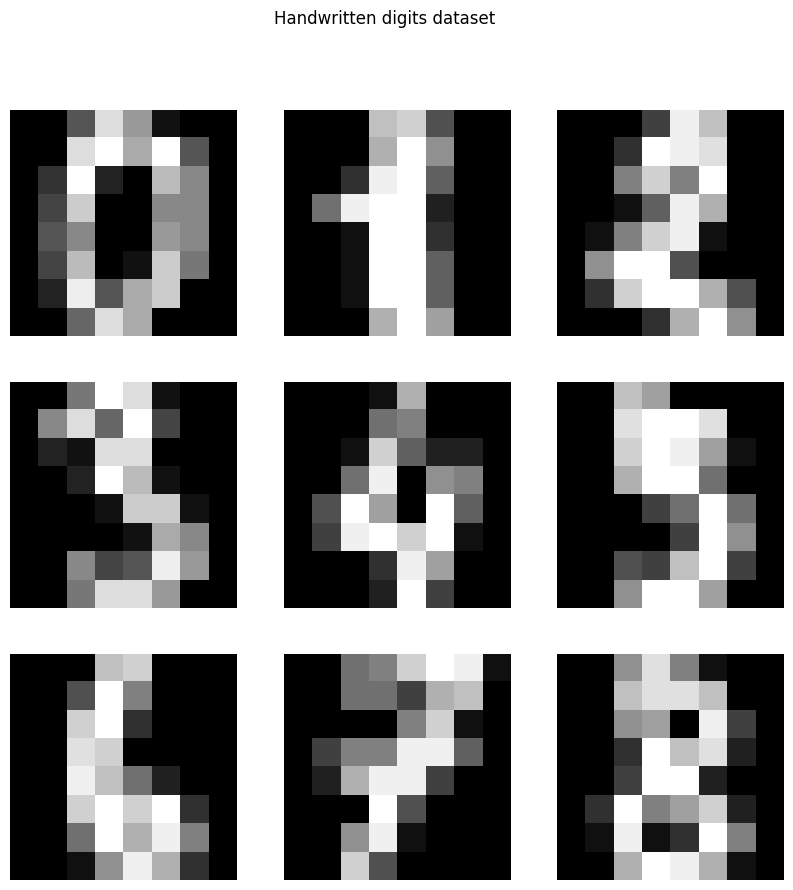

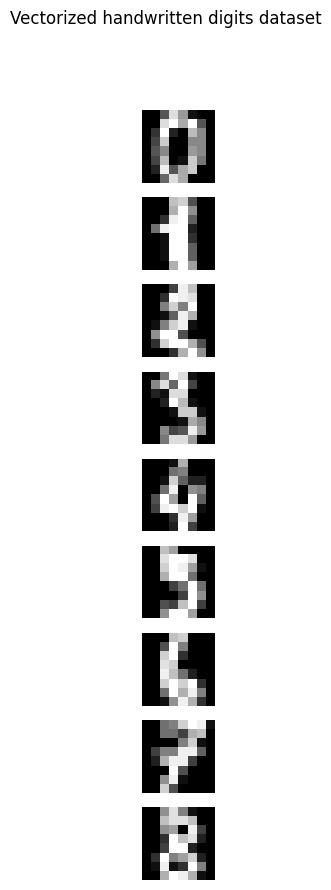

In [ ]:
# DONE: Get the number of dimensions in the dataset
n_dim = X.shape[1]

# DONE: Reshape handwritten digits dataset to N x 8 x 8
X_reshaped = X.reshape(-1, 8, 8)

# DONE: Plot 3 x 3 panel of handwritten digits with title 'Handwritten digits dataset'
plot_images(X_reshaped, 3, 3, 'Handwritten digits dataset')

# DONE: Vectorize handwritten digits dataset to N x D
X_vec = X_reshaped.reshape(-1, n_dim)

# DONE: Plot 9 x 1 panel of handwritten digits with title 'Vectorized handwritten digits dataset'
X_vec_reshaped = X_vec.reshape(-1, 8, 8)
plot_images(X_vec_reshaped, 9, 1, 'Vectorized handwritten digits dataset')

Compressing and reconstructing with principal component analysis (PCA)

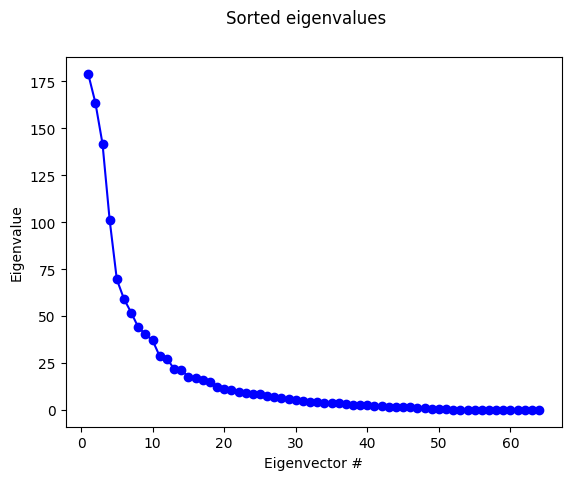

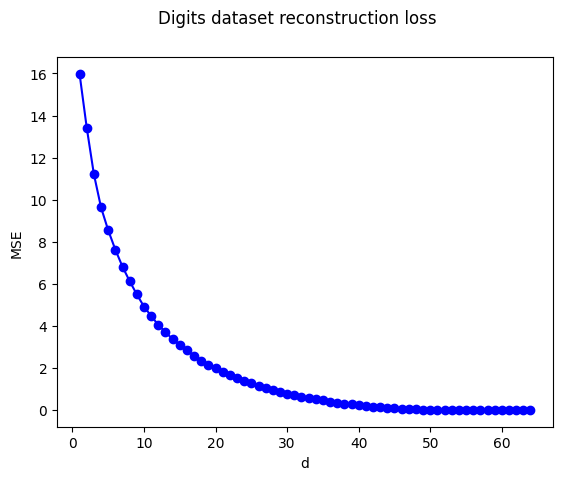

In [8]:
# DONE: Plot full set of eigenvalues for dataset
# set title of plot 'Sorted eigenvalues' with xlabel of 'Eigenvector #' and ylabel of 'Eigenvalue'
pca = PrincipalComponentAnalysis(n_dim)
pca.fit(X_vec)
eigenvalues = pca.get_eigenvalues()
plot(np.arange(1, n_dim + 1), eigenvalues, 'Sorted eigenvalues', 'Eigenvector #', 'Eigenvalue')

# MSE scores to keep track of loss from compression
mse_scores = []

# Test reconstruction error using top d number of eigenvectors
for d in range(1, n_dim + 1):

    # DONE: Fit PCA to data
    pca = PrincipalComponentAnalysis(d)
    pca.fit(X_vec)

    # DONE: Project the data to subspace
    Z = pca.project_to_subspace(X_vec)

    # DONE: Reconstruct the original data
    X_hat = pca.reconstruct_from_subspace(Z)

    # DONE: Measures mean squared error between original data and reconstructed data
    mse_score = skmetrics.mean_squared_error(X_vec, X_hat)

    # DONE: Save MSE score
    mse_scores.append(mse_score)

# DONE: Create plot for number of top eigenvectors used and their MSE for reconstruction
# set title of plot 'Digits dataset reconstruction loss' with xlabel of 'd' and ylabel of 'MSE'
plot(np.arange(1, n_dim + 1), mse_scores, 'Digits dataset reconstruction loss', 'd', 'MSE')

Visualize data using PCA

Text(0.5, 0, 'PC3')

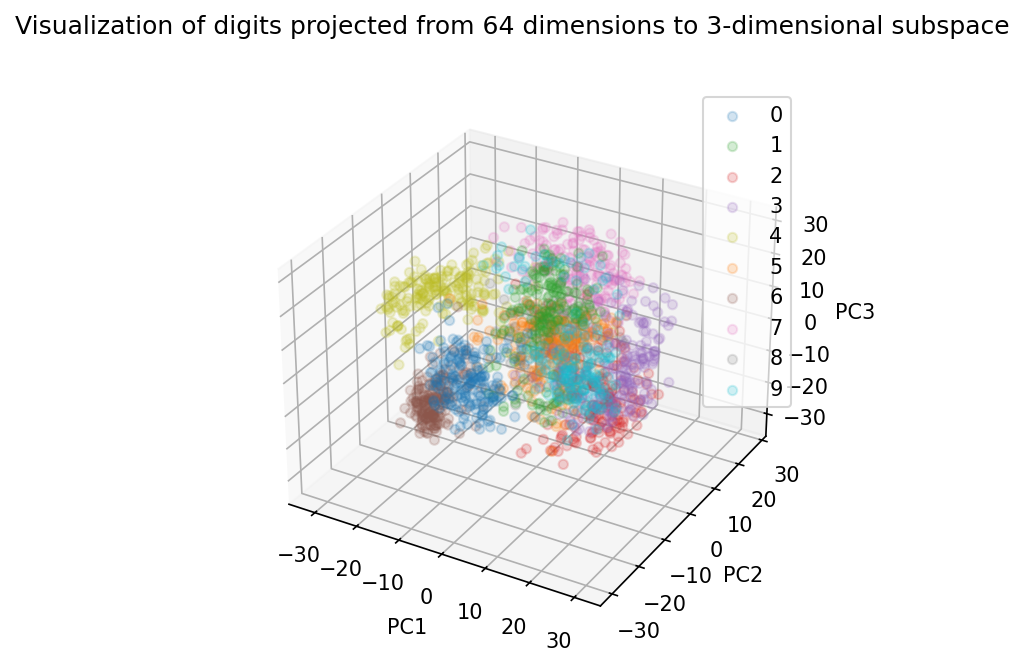

In [ ]:
# Set colors
colors = [
    'tab:blue',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:olive',
    'tab:orange',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:cyan'
]

# DONE?: Project the data into 3-dimensional subspace
pca = PrincipalComponentAnalysis(3)
pca.fit(X_vec)
Z = pca.project_to_subspace(X_vec)

fig = plt.figure(dpi=150)
fig.suptitle('Visualization of digits projected from {} dimensions to 3-dimensional subspace'.format(n_dim))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Iterate through each class and plot them into the figure as scatter plot with different colors
for label, color in zip(np.sort(np.unique(y)), colors):

    # DONE?: Select from projected points the ones belonging to current class
    Z_class = Z[y == label]

    # DONE: Plot using scatter for selected points with associated color
    # set the plot label as label, set alpha to 0.2
    ax.scatter(Z_class[:, 0], Z_class[:, 1], Z_class[:, 2], c=color, label=label, alpha=0.2)

# DONE: Turn on legend and set loc to best
ax.legend(loc='best')

# DONE: set xlabel, ylabel and zlabel to their respective principal component (PC#)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Select 2s from digits dataset

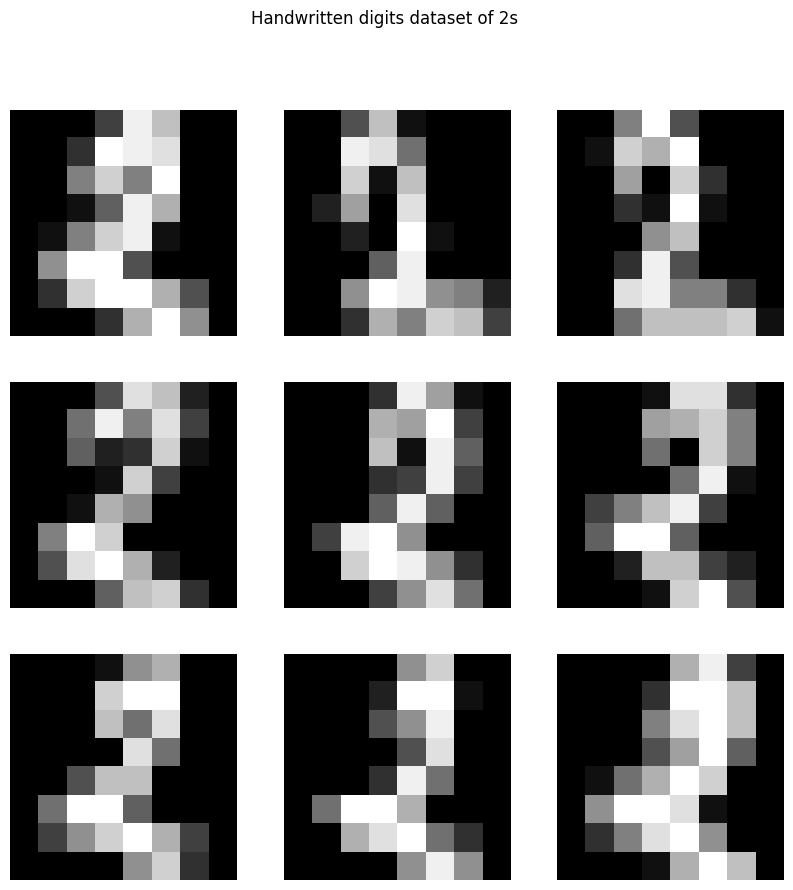

In [20]:
# DONE: Select all 2's from the digit dataset
X_2s = X_vec[y == 2]

# DONE: Reshape handwritten digits dataset of 2s to (N, 8, 8)
X_2s_reshaped = X_2s.reshape(-1, 8, 8)

# DONE: Plot 3 x 3 panel of handwritten digits and name is 'Handwritten digits dataset of 2s'
plot_images(X_2s_reshaped, 3, 3, 'Handwritten digits dataset of 2s')

PCA as a generative model

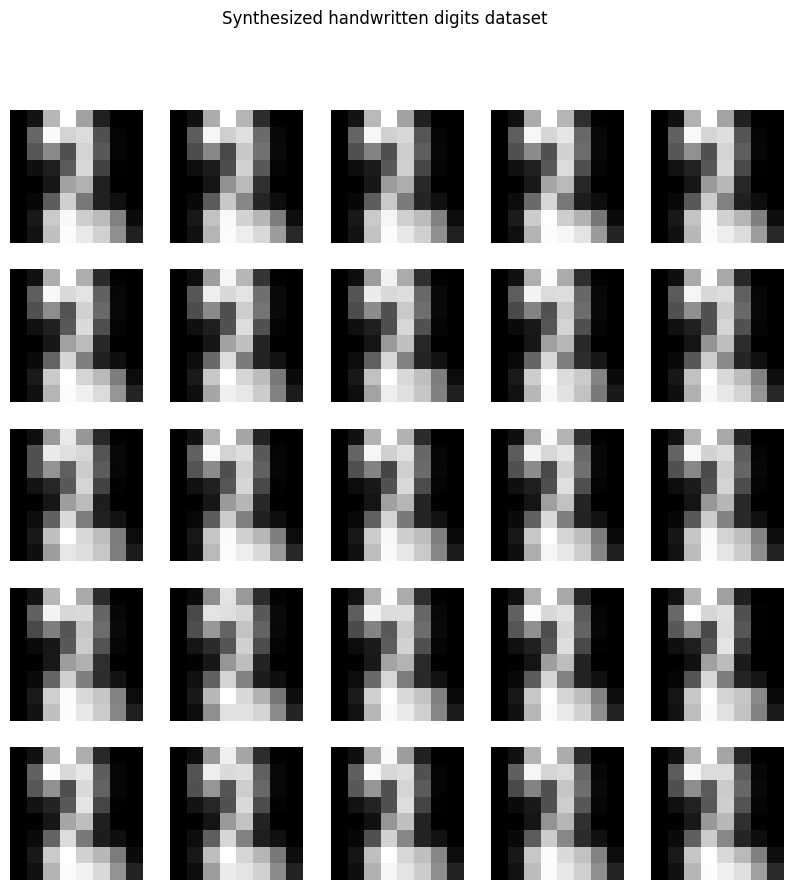

In [ ]:
# DONE: Vectorize handwritten digits dataset of 2s
X_2s_vec = X_2s_reshaped.reshape(-1, n_dim)

# DONE: Compute PCA and with 5 dimensions
pca_2s = PrincipalComponentAnalysis(5)
pca_2s.fit(X_2s_vec)

# DONE: Generate 25 novel examples
X_2s_hat = pca_2s.generate_new_samples(25)

# DONE: Plot 5 x 5 panel of handwritten digits and name is 'Synthesized handwritten digits dataset'
plot_images(X_2s_hat.reshape(-1, 8, 8), 5, 5, 'Synthesized handwritten digits dataset')

## Part 2: Olivetti Faces Dataset

In [ ]:
# Load Olivetti faces dataset
from sklearn.datasets import fetch_olivetti_faces
faces_dataset = fetch_olivetti_faces(shuffle=True)

# Dataset of face images with shape (N, 64, 64)
X_faces = faces_dataset.images
y_faces = faces_dataset.target

print('Faces dataset shape: {}'.format(X_faces.shape))
print('Number of unique individuals: {}'.format(len(np.unique(y_faces))))

Visualize faces dataset

In [ ]:
# TODO: Get the dimensions of a face image
face_height, face_width = None, None

# TODO: Plot 3 x 3 panel of face images with title 'Olivetti faces dataset'


# TODO: Vectorize face images to N x D
X_faces_vec = None

# TODO: Plot 9 x 1 panel of vectorized face images with title 'Vectorized Olivetti faces dataset'


Compressing and reconstructing faces with PCA

In [ ]:
# Get the number of dimensions in the faces dataset
n_dim_faces = X_faces_vec.shape[1] if X_faces_vec is not None else 0

# TODO: Plot full set of eigenvalues for faces dataset
# set title of plot 'Sorted eigenvalues (Faces)' with xlabel of 'Eigenvector #' and ylabel of 'Eigenvalue'
# Note: Computing all eigenvalues would be computationally expensive
# Let's compute a reasonable number, say 100
n_components_to_compute = 100
pca_faces = None

# MSE scores to keep track of loss from compression
mse_scores_faces = []

# Test reconstruction error using top d number of eigenvectors
# Use a reasonable range to save computation
d_values = np.arange(1, 101, 5)  # [1, 6, 11, ..., 96]
for d in d_values:
    # TODO: Fit PCA to face data
    pca_faces = None

    # TODO: Project the data to subspace
    Z_faces = None

    # TODO: Reconstruct the original data
    X_faces_hat = None

    # TODO: Measures mean squared error between original data and reconstructed data
    mse_score_faces = 0.0

    # TODO: Save MSE score

    # Print progress
    print('Completed PCA with {d} components'.format(d))

# TODO: Create plot for number of top eigenvectors used and their MSE for reconstruction
# set title of plot 'Faces dataset reconstruction loss' with xlabel of 'd' and ylabel of 'MSE'


Visualizing Faces in 3D Space

In [ ]:
# TODO: Project the face data into 3-dimensional subspace
pca_faces_3d = None
Z_faces_3d = None

fig = plt.figure(dpi=150, figsize=(10, 8))
fig.suptitle('Visualization of faces projected from {} dimensions to 3-dimensional subspace'.format(n_dim_faces))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# For clarity, let's select a subset of identities
selected_identities = np.arange(10)  # First 10 identities
identity_colors = colors[:len(selected_identities)]

# TODO: Plot each identity with a different color
# Hint: Use indices = np.where(y_faces == identity)[0] to find indices for each identity
# Then use ax.scatter to plot the corresponding points from Z_faces_3d

# TODO: Add legend, labels for the axes (PC1, PC2, PC3)

Visualizing Eigenfaces

In [ ]:
# TODO: Fit PCA to face data with 9 components
pca_eigenfaces = None

# TODO: Get the eigenfaces by reshaping the components to (n_components, face_height, face_width)
# Hint: Also get the mean face by reshaping the mean
mean_face = None
eigenfaces = None

# TODO: Plot the mean face and the first 8 eigenfaces in a 3 x 3 grid
# First subplot should be the mean face, remaining 8 should be the eigenfaces
# Hint: Use plt.subplots(3, 3) to create the grid

Face Reconstruction with Different Numbers of Components

In [ ]:
# TODO: Create a function to visualize original and reconstructed faces
def plot_face_reconstruction(X_original, X_reconstructed, n_components, n_faces=5):
    '''
    Plot original and reconstructed faces

    Args:
        X_original: Original face images (n_samples, height, width)
        X_reconstructed: Reconstructed face images (n_samples, height, width)
        n_components: Number of principal components used for reconstruction
        n_faces: Number of faces to display
    '''

    # TODO: Implement the function

# TODO: Generate reconstructions with different numbers of components (e.g., 5, 15, 30, 50, 100)
# TODO: Visualize the original and reconstructed faces side by side
n_faces_to_show = 5
components_to_try = [5, 15, 30, 50, 100]

Face Generation for a Single Identity

In [ ]:
identity_idx = 30  # Choose identity

# TODO: Select all faces from a single identity
X_single_identity = None

# Show the original faces for this identity
X_single_identity_images = X_faces[y_faces == identity_idx] if X_faces is not None else None
if X_single_identity_images is not None:
    plot_images(X_single_identity_images, 2, 5, 'Original faces of person {}'.format(identity_idx))

# TODO: Compute PCA with 5 dimensions on this subset
pca_identity = None

# TODO: Generate 25 novel face examples for this identity
X_generated_faces = None

# TODO: Plot 5 x 5 panel of generated faces and name it 'Synthesized faces dataset'
# Hint: Don't forget to reshape the generated faces back to 2D images

# Show plots
plt.show()